In [1]:
using Flux

In [2]:
using LinearAlgebra

In [3]:
model = randn(Float32, 32, 16)

32×16 Matrix{Float32}:
  0.0774196  -0.823959   0.575087  …   0.726584   -2.70231    0.272297
 -0.633082    0.972189   0.654141     -0.81521     0.848427  -0.267166
  0.14027    -0.635809  -0.239828     -0.265002    0.25749   -0.110033
 -0.201173    0.590438  -0.348222     -0.192744   -1.39123   -0.866107
  1.14113    -0.641235   1.2943        0.555515   -0.534586   1.7124
 -0.67375    -1.2301    -0.660052  …  -1.32392     0.580683   0.288309
 -0.817634   -1.42302    0.171994     -1.70535    -1.09298   -2.04335
  1.97745    -1.05481   -0.598895      0.0784524  -0.822358  -0.233221
  0.54094     0.165417  -0.225683      1.04079    -0.19547    1.77109
 -0.860716    0.344297  -0.703168      1.54303    -0.767878   0.225128
  ⋮                                ⋱                          ⋮
  1.81355     0.21719   -0.189058      0.786813   -1.64205   -1.9837
 -1.37711     1.67408    0.594394     -2.29104    -1.15247   -0.804878
  0.730359   -0.446164   0.185226  …  -1.34372     0.834247  -0.807

In [4]:
Uvec::Vector{Matrix{ComplexF32}} = []
for i in 1:4, j in 1:4
    M1 = zeros(ComplexF32, 4, 4)
    M2 = zeros(ComplexF32, 4, 4)
    M1[i,j] = 1.0
    M2[i,j] = 1.0im
    push!(Uvec,M1)
    push!(Uvec,M2)
end

println(Uvec)

Matrix{ComplexF32}[[1.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im], [0.0f0 + 1.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im], [0.0f0 + 0.0f0im 1.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im], [0.0f0 + 0.0f0im 0.0f0 + 1.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im;

In [5]:
function VtoMU(V)
    return V' * Uvec
end

VtoMU (generic function with 1 method)

In [6]:
test = rand(Float32, 32)
test2 = VtoMU(test)

4×4 Matrix{ComplexF32}:
  0.15957+0.434152im   0.779054+0.58013im   …  0.802752+0.226685im
 0.794478+0.097755im   0.561978+0.205275im     0.195445+0.446355im
 0.602556+0.798891im  0.0736433+0.361763im     0.821642+0.0880785im
 0.264569+0.632918im   0.961104+0.507541im     0.633016+0.723071im

In [7]:
eta_min = Float32(1e-6)

1.0f-6

In [12]:
II = Matrix{Float32}(I, 4,4)
#[Matrix{Float32}(I, 4,4) for i in 1:50]

4×4 Matrix{Float32}:
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0

In [13]:
function loss(V,Bs, m)
    U = VtoMU(m*V)
    L = (U'*U -II*Bs)
    return log((real(tr(L'*L)))/Bs+eta_min)
    #return tr(L^2)
end

loss (generic function with 1 method)

In [55]:
function loss2(V::Vector{Float32}, m)
    U = VtoMU(m*V)
    L = real.(U*U'-II)
    #return log(tr(L'*L)+eta_min)
    return tr(L^2)
end

loss2 (generic function with 1 method)

In [16]:
model = randn(Float32, 32, 16)
test = rand(Float32, 16, 10)
l_test = loss(test,10, model)

10.838281f0

In [14]:
it_M = 20000
loss_it = zeros(Float32, it_M)
opt = ADAM()
bs = 10
for it in 1:it_M
    v16 = rand(Float32, 16, bs)
    ls::Float32 = 0.0
    grads = Flux.gradient(Flux.params(model)) do
        #loss_calc_hyb(model, en, ag, HF_it)
        ls = loss(v16,bs, model)
    end
    loss_it[it] = ls
    Flux.Optimise.update!(opt, Flux.params(model), grads)
end

MethodError: MethodError: Cannot `convert` an object of type Nothing to an object of type Matrix{ComplexF32}
Closest candidates are:
  convert(::Type{T}, !Matched::Factorization) where T<:AbstractArray at ~/.julia/juliaup/julia-1.8.5+0.x64.linux.gnu/share/julia/stdlib/v1.8/LinearAlgebra/src/factorization.jl:58
  convert(::Type{Array{T, N}}, !Matched::StaticArraysCore.SizedArray{S, T, N, N, Array{T, N}}) where {S, T, N} at ~/.julia/packages/StaticArrays/pTgFe/src/SizedArray.jl:88
  convert(::Type{Array{T, N}}, !Matched::StaticArraysCore.SizedArray{S, T, N, M, TData} where {M, TData<:AbstractArray{T, M}}) where {T, S, N} at ~/.julia/packages/StaticArrays/pTgFe/src/SizedArray.jl:82
  ...

In [45]:
using Plots

In [71]:
ave = 500
N = div(it_M,ave)
loss_av = zeros(Float32, N)
for it in 1:N
    loss_av[it] = sum(loss_it[(it-1)*ave+1:it*ave])/ave    
end

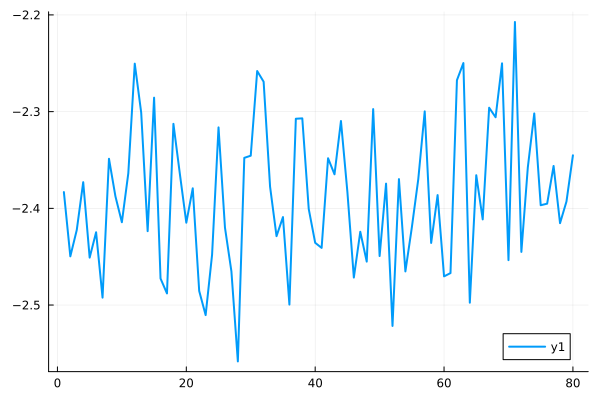

In [72]:
plot(loss_av, linewidth=2.0)

In [73]:
v_test = rand(Float32, 16)
U_test = VtoMU(model*v_test)
LL = real.(U_test*U_test'- II)

4×4 Matrix{Float32}:
 -0.0638676  -0.0148313   -0.0191496   0.0175865
 -0.0148313  -0.0830582    0.0138101   0.00934803
 -0.0191496   0.0138101   -0.119475    0.0111561
  0.0175865   0.00934803   0.0111561  -0.129771